In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv', parse_dates=['Date'], index_col=['Date'] ).dropna()

#Glimpse of Data
stock_prices.head()

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
Date,,,,,,,,,,
2014-03-31,264,69,455,263,68,5543,555,298,83,278
2014-07-04,257,68,458,276,70,5728,610,279,84,303
2014-04-14,254,68,454,270,68,5649,607,279,83,280
2014-04-21,253,68,488,283,68,5692,604,274,83,282
2014-04-28,256,65,482,282,63,5582,611,238,79,243


Fixing messy column names (containing spaces) for ease of use

In [3]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('.', '')

Checking top 5 rows again

In [4]:
stock_prices.head()


,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
Date,,,,,,,,,,
2014-03-31,264,69,455,263,68,5543,555,298,83,278
2014-07-04,257,68,458,276,70,5728,610,279,84,303
2014-04-14,254,68,454,270,68,5649,607,279,83,280
2014-04-21,253,68,488,283,68,5692,604,274,83,282
2014-04-28,256,65,482,282,63,5582,611,238,79,243


First, let us check the number of rows (observations) and the number of columns (variables)

In [5]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 10


Checking data types of all columns

In [6]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 314 entries, 2014-03-31 to 2020-03-30
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Infosys              314 non-null    int64
 1   Indian_Hotel         314 non-null    int64
 2   Mahindra_&_Mahindra  314 non-null    int64
 3   Axis_Bank            314 non-null    int64
 4   SAIL                 314 non-null    int64
 5   Shree_Cement         314 non-null    int64
 6   Sun_Pharma           314 non-null    int64
 7   Jindal_Steel         314 non-null    int64
 8   Idea_Vodafone        314 non-null    int64
 9   Jet_Airways          314 non-null    int64
dtypes: int64(10)
memory usage: 27.0 KB


Now, let us check the basic measures of descriptive statistics for the continuous variables

In [7]:
stock_prices.describe()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


2.1 Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference

Text(0.5, 0, 'Year')

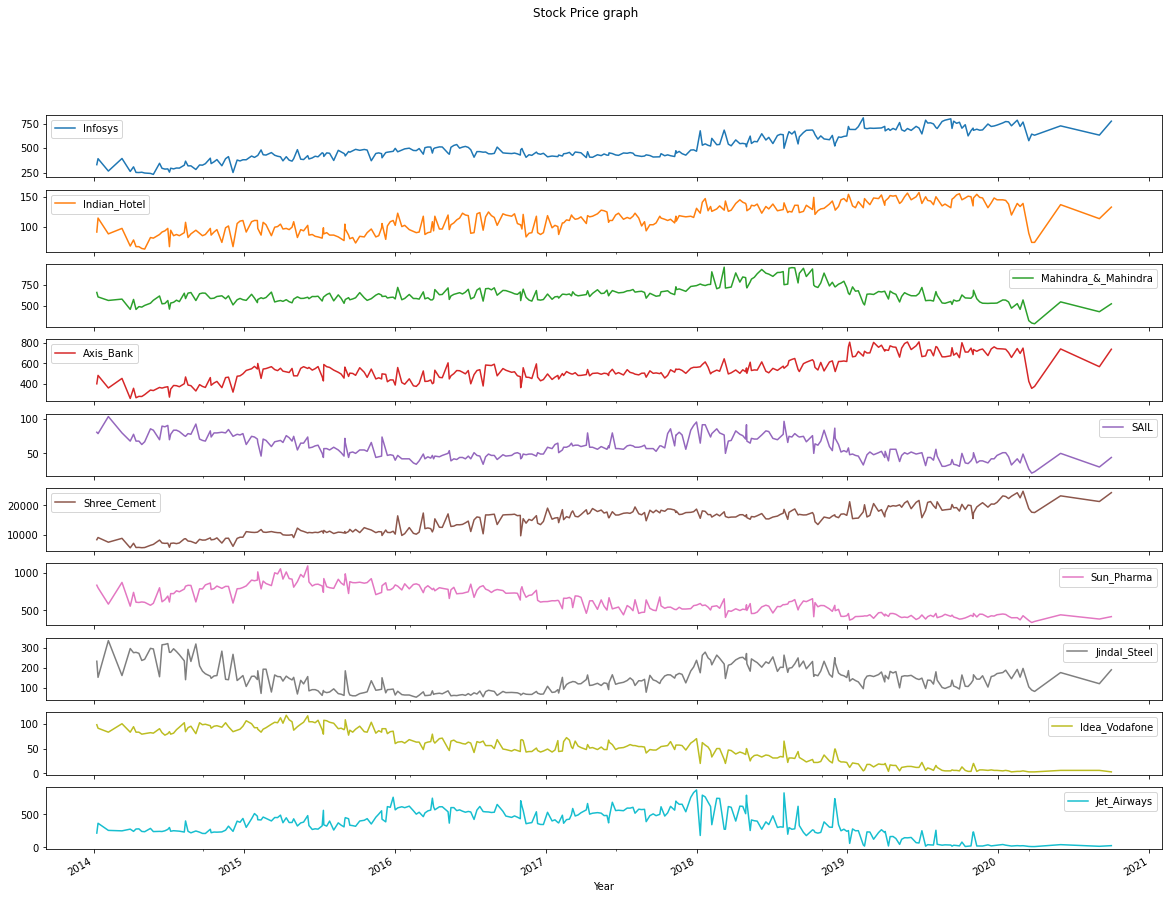

In [8]:
# visualize the stock_data
stock_prices.plot(subplots=True, title='Stock Price graph', figsize=(20, 15))
plt.xlabel("Year")



Text(0.5, 0, 'Year')

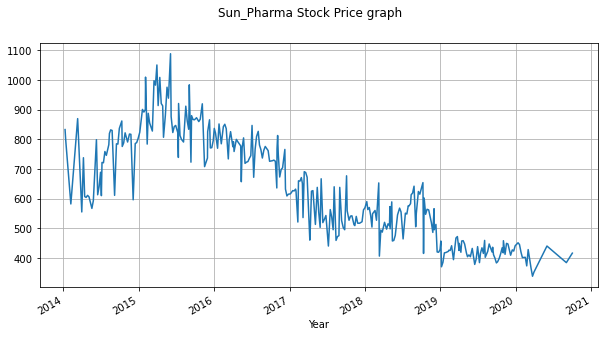

In [25]:
# visualize the stock_data
stock_prices["Sun_Pharma"].plot(subplots=True, title='Sun_Pharma Stock Price graph', figsize=(10,5),grid= True)
plt.xlabel("Year")



Text(0.5, 0, 'Year')

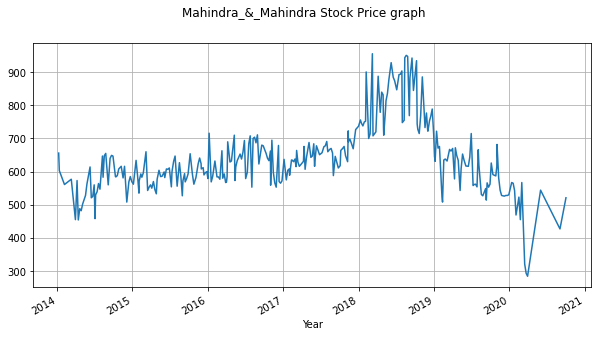

In [26]:
stock_prices["Mahindra_&_Mahindra"].plot(subplots=True, title='Mahindra_&_Mahindra Stock Price graph', figsize=(10,5),grid= True)
plt.xlabel("Year")


### 2.2 Calculate Returns for all stocks with inference

### Analyzing returns
## steps for calculating returns from prices:

Take logarithms
Take differences

In [11]:
stock_returns = np.log(stock_prices).diff(axis = 0, periods = 1) 

### Checking the rows & columns of dataset

In [12]:
stock_returns.shape

(314, 10)

### Checking top 5 rows

In [13]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
Date,,,,,,,,,,
2014-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-04,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2014-04-14,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
2014-04-21,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
2014-04-28,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


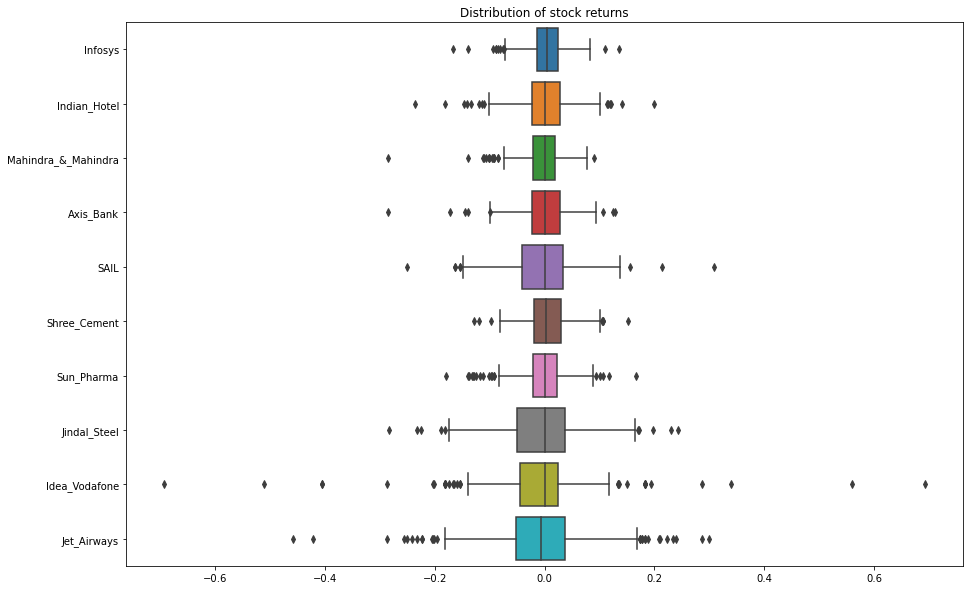

In [27]:
plt.subplots(figsize=(15,10))
plt.title('Distribution of stock returns')
sns.boxplot(data=stock_returns,orient="h")
plt.show()

#### 2.3 Calculate Stock Means and Standard Deviation for all stocks with inference

## We now look at Means & Standard Deviations of these returns
## Stock Means: Average returns that the stock is making on a week to week basis
## Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock

Calculating stock means

In [21]:
stock_means = stock_returns.mean(axis = 0)
stock_means.sort_values(ascending=False)

Shree_Cement           0.003681
Infosys                0.002794
Axis_Bank              0.001167
Indian_Hotel           0.000266
Sun_Pharma            -0.001455
Mahindra_&_Mahindra   -0.001506
SAIL                  -0.003463
Jindal_Steel          -0.004123
Jet_Airways           -0.009548
Idea_Vodafone         -0.010608
dtype: float64

Calculating stock standard deviation

In [22]:
stock_sd = stock_returns.std(axis = 0)
stock_sd.sort_values(ascending=False)

Idea_Vodafone          0.104315
Jet_Airways            0.097972
Jindal_Steel           0.075108
SAIL                   0.062188
Indian_Hotel           0.047131
Axis_Bank              0.045828
Sun_Pharma             0.045033
Mahindra_&_Mahindra    0.040169
Shree_Cement           0.039917
Infosys                0.035070
dtype: float64

In [24]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

,Average,Volatility
Infosys,0.002794,0.035070
Indian_Hotel,0.000266,0.047131
Mahindra_&_Mahindra,-0.001506,0.040169
Axis_Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree_Cement,0.003681,0.039917
Sun_Pharma,-0.001455,0.045033
Jindal_Steel,-0.004123,0.075108
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972


### 2.4 Draw a plot of Stock Means vs Standard Deviation and state your inference

Let us plot & see what they say about stock prices

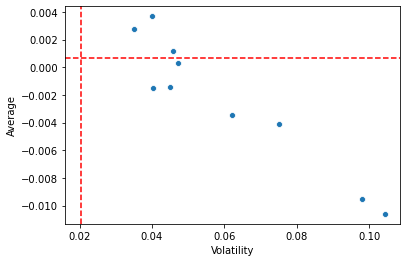

In [18]:
plot = sns.scatterplot(df['Volatility'], df['Average'])
plot.axvline(x=0.020257,linestyle='--', color = "red")
plot.axhline(y=0.000683,linestyle='--', color = "red")
plt.show()

Stock with a lower mean & higher standard deviation do not play a role in a portfolio that has competing stock with more returns & less risk. Thus for the data we have here, we are only left few stocks:

Ones with higher return for a comparative or lower risk are considered better